In [9]:
using Plots
using DelimitedFiles
import PyPlot as plt
using Statistics
using LaTeXStrings

# Instructions

User should execute "edgeaware_automated.jl" to obtain the execution times used for the plots

# Plots

In [19]:
paths = readdir("../edgeaware_times/");

In [20]:
cond_rec(lx,ly) = max(((1 + 2* lx) *(1 + 4 *ly))/(1 + 2 *lx + 4 *ly),((1 + 2* ly) *(1 + 4 *lx))/(1 + 2 *ly + 4 *lx))
cond_cg(lx,ly) = 1 + 4*lx + 4*ly

theoretical_rate_rec(lx,ly,X) = ((sqrt(cond_rec(lx,ly))-1)/(sqrt(cond_rec(lx,ly))+1)) .^ X #multiply by 2??
theoretical_rate_cg(lx,ly,X) = ((sqrt(cond_cg(lx,ly))-1)/(sqrt(cond_cg(lx,ly))+1)) .^ X;

p = readdlm("../source/input_params.txt",',')
lx = p[1]
ly = p[2]
mu = p[3];

In [21]:
paths_cg = [p for p in paths if occursin("-cg",p)]
paths_bicrec = [p for p in paths if occursin("-bicrec",p)]
paths_mul = [p for p in paths if occursin("-mul",p)];
paths_chol = [p for p in paths if occursin("-chol",p)];



In [22]:
#Number of iterations used in the executions
X_rec = []
i=0
while i <= 200
    i = i + Int(floor(sqrt(i+1)))
    append!(X_rec,i)
end

In [23]:
function plot_graph(i)
    path_bicrec = paths_bicrec[i]
    path_mul = paths_mul[i]
    path_cg = paths_cg[i]
    path_chol = paths_chol[i]

    data_cg =readdlm("../edgeaware_times/$path_cg", ',');
    data_bicrec = readdlm("../edgeaware_times/$path_bicrec", ',');
    data_mul= readdlm("../edgeaware_times/$path_mul", ',');
    data_chol = readdlm("../edgeaware_times/$path_chol", ',');

    data_cg[:,2] ./= data_cg[1,2]
    data_bicrec[:,2] ./= data_bicrec[1,2]
    data_mul[:,2] ./= data_mul[1,2]
    
    
    wid= 0.8
    msize = 4
    a = 0.75

    fig, axs = plt.subplots(1, 2)

    fig.set_figwidth(7)
    fig.set_figheight(4)

    axs[2].plot(X_rec, (data_cg[:,2]), label="Standard CG (Eigen)", lw =wid, marker = "|" ,linestyle="-", markersize=msize,alpha = a)
    axs[2].plot(X_rec, (data_bicrec[:,2]), label="Recusrive BICGSTAB (Ours)", lw =wid, marker = "+" ,linestyle="-", markersize=msize,alpha = a)

    axs[2].plot(X_rec, (theoretical_rate_cg(lx,ly,X_rec)), label="CG Theoretical", lw =wid, markersize=msize, alpha =a)
    axs[2].plot(X_rec, (theoretical_rate_rec(lx,ly,X_rec)), label="Recursive CG Theoretical" , lw =wid , markersize=msize, alpha = a)

    axs[2].legend(fontsize=6)
    plt.yscale("log")
    axs[2].set(xlabel="iterations")

    axs[1].set(xlabel="time(s)")
    axs[1].set(ylabel="Convergence Rate")


    axs[1].plot(data_cg[:,1], (data_cg[:,2]), label="Standard CG (Eigen)", lw =wid, marker = "|" ,linestyle="-", markersize=msize,alpha = a)
    axs[1].plot(data_bicrec[:,1], (data_bicrec[:,2]), label="Recursive BICGSTAB (Ours)", lw =wid, marker = "+" ,linestyle="-", markersize=msize,alpha = a)

    #axs[1].plot(data_cg[:,1], (theoretical_rate_cg(lx,ly,X_rec)), label="CG Theoretical", lw =wid, markersize=msize, alpha =a)
    #axs[1].plot(data_bicrec[:,1], (theoretical_rate_rec(lx,ly,X_rec)), label="Recursive CG Theoretical" , lw =wid , markersize=msize, alpha = a)

    
    axs[1].plot(data_mul[:,1], (data_mul[:,2]), label="AMG solver", lw =wid, marker = "o" , markersize=msize, color = "gray")
    axs[1].set(yscale="log")

    axs[1].axvline(x = data_chol, label= "Cholesky", linestyle = "--", color = "black")

    
    axs[1].legend(fontsize=6,  loc="upper right")

    axs[1].set(ylim = (minimum(data_cg[:,2] .- 1e-5),1))
    axs[2].set(ylim = (minimum(data_cg[:,2] .- 1e-5),1))
    axs[1].set(xlim = (0, maximum(data_chol[1] + 0.1)))

    axs[2].set_yticklabels([])
    axs[2].set_yticks([], minor=true)
    axs[2].set_yticks([])



    #axs[2].ylabel("Convergence Rate")
    fig.tight_layout(pad=0.)
end


plot_graph (generic function with 1 method)

kodak1-bicrec.csv
kodak1-cg.csv
kodak1-chol.csv


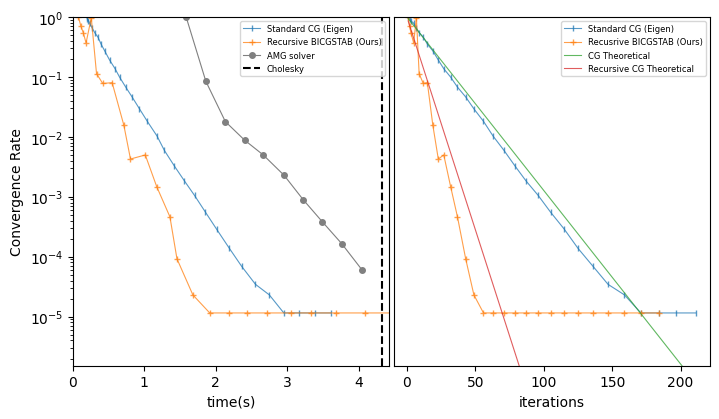

In [24]:
i = 1
#print(paths_rec[i],"\n")
print(paths_bicrec[i],"\n")
print(paths_cg[i],"\n")
print(paths_chol[i],"\n")
plot_graph(i)
plt.savefig("comparison_time_iteration.pdf")

# All plots

In [25]:
nplots = length(paths_mul)

all_cg = 0
all_mul = 0
all_bicrec= 0
for i =1:nplots
    path_bicrec = paths_bicrec[i]
    path_mul = paths_mul[i]
    path_cg = paths_cg[i]
    
    if i==1
        data_cg =readdlm("../edgeaware_times/$path_cg", ',');
        data_bicrec = readdlm("../edgeaware_times/$path_bicrec", ',');
        data_mul= readdlm("../edgeaware_times/$path_mul", ',');

        all_bicrec = zeros(size(data_bicrec)[1], size(data_bicrec)[2], nplots)
        all_cg = zeros(size(data_cg)[1], size(data_cg)[2], nplots)
        all_mul = zeros(size(data_mul)[1], size(data_mul)[2], nplots)
        
        all_cg[:,:,1] = data_cg
        all_bicrec[:,:,1] = data_bicrec
        all_mul[:,:,1] = data_mul
        
    else
        all_cg[:,:,i] +=readdlm("../edgeaware_times/$path_cg", ',');
        all_bicrec[:,:,i] += readdlm("../edgeaware_times/$path_bicrec", ',');
        all_mul[:,:,i] += readdlm("../edgeaware_times/$path_mul", ',');
        
    end
    
end

for i = 1:nplots
    all_cg[:,2,i] = all_cg[:,2,i] ./ all_cg[1,2,i]
    all_bicrec[:,2,i] = all_bicrec[:,2,i] ./ all_bicrec[1,2,i]
    all_mul[:,2,i] = all_mul[:,2,i] ./ all_mul[1,2,i]

end

# Worst/Best case

In [27]:
using Interpolations

In [28]:
function get_interp(data)
    X = data[:,1]
    Y = data[:,2]
    return LinearInterpolation(X, Y);
end;

In [29]:
areas = []
for idx = 1 : length(paths_bicrec)
    f_cg = get_interp(all_cg[:,:,idx])
    f_bicrec = get_interp(all_bicrec[:,:,idx]);
    X_bicrec = all_bicrec[:,1,idx]
    X_cg = all_cg[:,1,idx]

    st = max(X_cg[1], X_bicrec[1])
    ed = min(X_cg[end], X_bicrec[end])
    npts = 1000
    diameter = (ed - st)/npts
    X = LinRange(st,ed,npts);
    area = sum(log.(f_cg.(X)) - log.(f_bicrec.(X)))/diameter
    append!(areas,area)
end

In [30]:
best_idx = argmax(areas);
worst_idx = argmin(areas);

print(best_idx, "\n")
print(worst_idx)

9
5

In [31]:
function plot_best_worst(ibest, iworst)
    path_bicrecb = paths_bicrec[ibest]
    path_mulb = paths_mul[ibest]
    path_cgb = paths_cg[ibest]
    path_cholb = paths_chol[ibest]

    data_cgb =readdlm("../edgeaware_times/$path_cgb", ',');
    data_bicrecb = readdlm("../edgeaware_times/$path_bicrecb", ',');
    data_mulb= readdlm("../edgeaware_times/$path_mulb", ',');
    data_cholb = readdlm("../edgeaware_times/$path_cholb", ',');

    data_cgb[:,2] ./= data_cgb[1,2]
    data_bicrecb[:,2] ./= data_bicrecb[1,2]
    data_mulb[:,2] ./= data_mulb[1,2]
    
    X = []

    i=0
    while i <= 200
        i = i + Int(floor(sqrt(i+1)))
        append!(X,i)
    end
    
    wid= 0.8
    msize = 4
    a = 0.75

    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(7)
    fig.set_figheight(4)
    
    axs[1].set(xlabel="time(s)")
    axs[1].set(ylabel="Convergence Rate")
    axs[1].plot(data_cgb[:,1], (data_cgb[:,2]), label="Standard CG (Eigen)", lw =wid, marker = "|" ,linestyle="-", markersize=msize,alpha = a)
    axs[1].plot(data_bicrecb[:,1], (data_bicrecb[:,2]), label="Recursive BICGSTAB (Ours)", lw =wid, marker = "+" ,linestyle="-", markersize=msize,alpha = a)
    axs[1].plot(data_mulb[:,1], (data_mulb[:,2]), label="AMG solver", lw =wid, marker = "o" , markersize=msize, color = "gray")
    axs[1].set(yscale="log")

    axs[1].axvline(x = data_cholb, label= "Cholesky", linestyle = "--", color = "black")

    
    axs[1].legend(fontsize=6,  loc="upper right")

    axs[1].set(ylim = (minimum(data_cgb[:,2] .- 1e-5),1))
    axs[3].set(ylim = (minimum(data_cgb[:,2] .- 1e-5),1))
    axs[1].set(xlim = (0, maximum(data_cholb[1] + 0.1)))

   
    # worst case
    path_bicrecw = paths_bicrec[iworst]
    path_mulw = paths_mul[iworst]
    path_cgw = paths_cg[iworst]
    path_cholw = paths_chol[iworst]

    data_cgw =readdlm("../edgeaware_times/$path_cgw", ',');
    data_bicrecw = readdlm("../edgeaware_times/$path_bicrecw", ',');
    data_mulw= readdlm("../edgeaware_times/$path_mulw", ',');
    data_cholw = readdlm("../edgeaware_times/$path_cholw", ',');

    data_cgw[:,2] ./= data_cgw[1,2]
    data_bicrecw[:,2] ./= data_bicrecw[1,2]
    data_mulw[:,2] ./= data_mulw[1,2]
    

    #Iteration graph
    axs[3].plot(X, (data_cgw[:,2]), label="Standard CG (Eigen)", lw =wid, marker = "|" ,linestyle="-", markersize=msize,alpha = a)
    axs[3].plot(X, (data_bicrecw[:,2]), label="Recusrive BICGSTAB (Ours)", lw =wid, marker = "+" ,linestyle="-", markersize=msize,alpha = a)
    axs[3].plot(X, (theoretical_rate_cg(lx,ly,X)), label="CG Theoretical", lw =wid, markersize=msize, alpha =a)
    axs[3].plot(X, (theoretical_rate_rec(lx,ly,X)), label="Recursive CG Theoretical" , lw =wid , markersize=msize, alpha = a)
    axs[3].legend(fontsize=6)
    plt.yscale("log")
    axs[3].set(xlabel="iterations")
    axs[3].set_yticklabels([])
    axs[3].set_yticks([], minor=true)
    axs[3].set_yticks([])


    
    axs[2].set(xlabel="time(s)")
    axs[2].plot(data_cgw[:,1], (data_cgw[:,2]), label="Standard CG (Eigen)", lw =wid, marker = "|" ,linestyle="-", markersize=msize,alpha = a)
    axs[2].plot(data_bicrecw[:,1], (data_bicrecw[:,2]), label="Recursive BICGSTAB (Ours)", lw =wid, marker = "+" ,linestyle="-", markersize=msize,alpha = a)
    axs[2].plot(data_mulw[:,1], (data_mulw[:,2]), label="AMG solver", lw =wid, marker = "o" , markersize=msize, color = "gray")
    axs[2].set(yscale="log")

    axs[2].axvline(x = data_cholw, label= "Cholesky", linestyle = "--", color = "black")

    
    axs[2].legend(fontsize=6,  loc="upper right")
    axs[2].set_yticklabels([])
    axs[2].set_yticks([], minor=true)
    axs[2].set_yticks([])



    
    axs[2].set(ylim = (minimum(data_cgb[:,2] .- 1e-5),1))
    axs[3].set(ylim = (minimum(data_cgb[:,2] .- 1e-5),1))
    axs[2].set(xlim = (0, maximum(data_cholb[1] + 0.1)))

       
    
    #axs[2].ylabel("Convergence Rate")
    fig.tight_layout(pad=0.1)
end


plot_best_worst (generic function with 1 method)

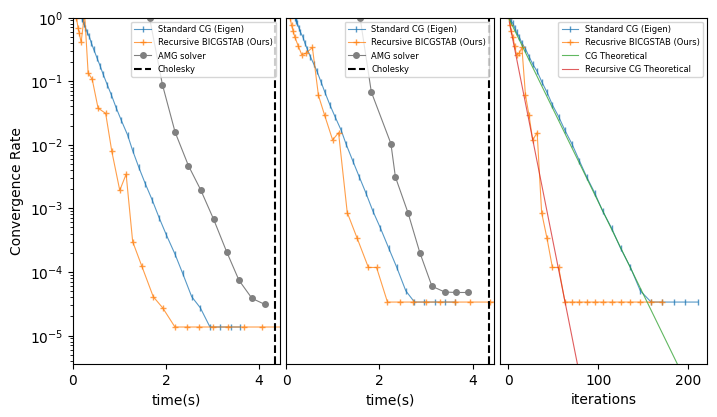

In [32]:
plot_best_worst(best_idx,worst_idx)
plt.savefig("comparison_time_iteration.pdf")